In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
data = pd.read_csv('547445df-366c-4634-b41d-1064f006dcca.csv')

data = data.drop(["player", "team", "g", "gs", "tgt", "rec", "Ctch%", "yds", "Y/R", "td", "1d", "lng", "Y/Tgt", "R/G", "Y/G", "fmb", "Rec.", "reyd", "retd", "rutd", "ruyd", "gp"], axis=1)
x = data['fppg']
y = data['ppg']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
#Correlation
print(data.corr(method='pearson')) # Pearson's r - look at last row

              fp      fppg    points       ppg
fp      1.000000  0.771206  0.316236  0.287461
fppg    0.771206  1.000000  0.356777  0.599223
points  0.316236  0.356777  1.000000  0.819775
ppg     0.287461  0.599223  0.819775  1.000000


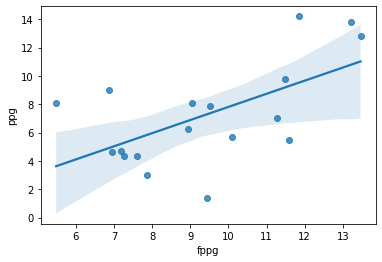

In [9]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('547445df-366c-4634-b41d-1064f006dcca.csv')
sns.regplot(x='fppg', y='ppg', data=data)


In [3]:
# Regression
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
x = x.values.reshape(-1, 1)
regressor.fit(x, y)

RandomForestRegressor()

    Actual  Predicted
0    204.9    137.943
1     27.3     45.829
2      6.8     45.856
3     88.2     88.942
4    193.4    145.736
5    110.7     96.308
6     84.2     93.245
7     62.6     74.663
8     64.9     71.747
9    129.9    112.439
10   153.0    110.438
11    84.9     87.589
12   129.8    104.181
13    99.5    103.583
14    75.5     73.356
15    45.5     70.663
16    56.9     55.491
17    27.9     53.086


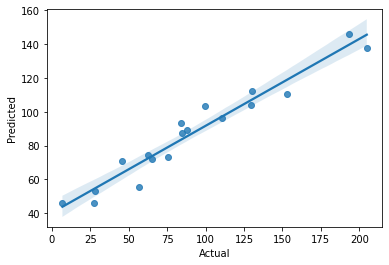

In [4]:
# Prediction
import seaborn as sns
y_pred = regressor.predict(x)
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
plt = sns.regplot(x=y, y=y_pred, data=data)
plt.set_xlabel("Actual", fontsize = 10)
plt.set_ylabel("Predicted", fontsize = 10)
print(df)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv('cfb_nfl_13.csv')

data = data.drop(["player"], axis=1)
data.drop(data[data["season"] != 2014].index, inplace = True)
data = data.drop(["season"], axis=1)
x = data['avgcfb']
y = data['post rank']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(data.corr(method='pearson')) # Pearson's r - look at last row

               avgfp    avgcfb      pick  draft rank  post rank
avgfp       1.000000  0.603041 -0.675058   -0.732115  -0.980812
avgcfb      0.603041  1.000000 -0.511564   -0.547329  -0.604637
pick       -0.675058 -0.511564  1.000000    0.981029   0.695512
draft rank -0.732115 -0.547329  0.981029    1.000000   0.761739
post rank  -0.980812 -0.604637  0.695512    0.761739   1.000000


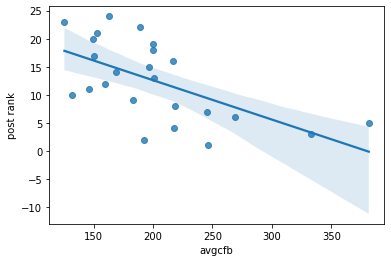

In [ ]:
# Regression
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
#x = x.values.reshape(-1, 1)
regressor.fit(x, y)
sns.regplot(x='avgcfb', y='post rank', data=data)